In [1]:
import math
import statistics
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy import stats as st
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import scikitplot as skplt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets


In [2]:
# https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python
cancer = datasets.load_breast_cancer()

In [ ]:
print("Features: ", cancer.feature_names)

In [ ]:
print("Labels: ", cancer.target_names)

In [ ]:
cancer.data.shape

In [ ]:
print(cancer.data[0:5])

In [ ]:
print(cancer.target)

In [9]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109) # 70% training and 30% test

In [ ]:
#Create a svm Classifier - kernel='rbf'
clf = svm.SVC(kernel='linear',probability=True)
clf.fit(X_train, y_train)

In [ ]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print('Accuracy of SVM classifier on test set: {:.2f}'.format(clf.score(X_test, y_test)))

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# ROC curve
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=1)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr,tpr, label='Support Vector Machine (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

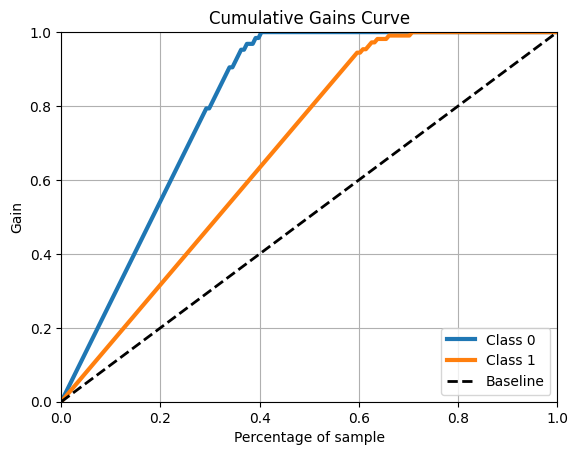

In [42]:
# Gain/Lift chart
y_pred_prob = clf.predict_proba(X_test)
skplt.metrics.plot_cumulative_gain(y_test, y_pred_prob)
plt.show()